In [212]:
import pandas as pd

In [213]:
# Load datasets
real_df = pd.read_csv('politifact_real_expanded_5000.csv')
fake_df = pd.read_csv('politifact_fake_expanded_5000.csv')

In [214]:
real_df.size

20000

In [215]:
fake_df.size

20000

In [216]:
real_df.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [217]:
#Adding a column label into dataset that will be our target attribute
real_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news

In [218]:
# Select 5 real and 5 fake for testing
sample_real = real_df.iloc[:5]
sample_fake = fake_df.iloc[:5]
df_sample = pd.concat([sample_real, sample_fake], ignore_index=True)
df_sample.to_csv("testsample.csv", index=False)

In [219]:
# Use remaining data for training
real_df_rest = real_df.iloc[5:]
fake_df_rest = fake_df.iloc[5:]

In [220]:
#Concat two dataset
df_train = pd.concat([real_df_rest, fake_df_rest], ignore_index=True)

In [221]:
# Shuffle the dataset
df= df_train.reset_index(drop=True)

In [222]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [223]:
import re

In [224]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [225]:
# Apply cleaning
df['cleaned_text'] = df['title'].astype(str).apply(clean_text)

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X=df['cleaned_text']
y=df['label']

In [228]:
#Training testing data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [230]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [231]:
import joblib
joblib.dump(vectorizer, "vectorizer.pkl") 

['vectorizer.pkl']

# MODEL 1: LOGISTIC REGRESSION

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
model1 = LogisticRegression()
model1.fit(X_train_tfidf, y_train)

LogisticRegression()

In [234]:
y_pred1 = model1.predict(X_test_tfidf)

In [235]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [236]:
print("Accuracy for logistic regression based model =", accuracy_score(y_test, y_pred1))

Accuracy for logistic regression based model = 0.9794794794794794


In [237]:
print("Precision for logistic regression based model =", precision_score(y_test, y_pred1))

Precision for logistic regression based model = 0.9718719689621726


In [238]:
print("Recall for Logistic Regression based model =", recall_score(y_test, y_pred1))

Recall for Logistic Regression based model = 0.9881656804733728


In [239]:
print("F1-score for Logistic Regression based model =", f1_score(y_test, y_pred1))

F1-score for Logistic Regression based model = 0.9799511002444988


# MODEL 2: NAIVE BAYES

In [240]:
from sklearn.naive_bayes import MultinomialNB

In [241]:
model2 = MultinomialNB()
model2.fit(X_train_tfidf, y_train)

MultinomialNB()

In [242]:
y_pred2 = model2.predict(X_test_tfidf)

In [243]:
print("Accuracy for Naive Bayes based model =", accuracy_score(y_test, y_pred2))

Accuracy for Naive Bayes based model = 0.9784784784784785


In [244]:
print("Precision for Naive Bayes based model =", precision_score(y_test, y_pred2))

Precision for Naive Bayes based model = 0.9802176063303659


In [245]:
print("Recall for Naive Bayes based model =", recall_score(y_test, y_pred2))

Recall for Naive Bayes based model = 0.9773175542406312


In [246]:
print("F1-score for Naive Bayes based model =", f1_score(y_test, y_pred2))

F1-score for Naive Bayes based model = 0.9787654320987654


# MODEL 3: SUPPORT VECTOR MACHINE CLASSIFIER

In [247]:
from sklearn.svm import SVC

In [248]:
model3 = SVC()
model3.fit(X_train_tfidf, y_train)

SVC()

In [249]:
y_pred3 = model3.predict(X_test_tfidf)

In [250]:
print("Accuracy for SVM based model =", accuracy_score(y_test, y_pred3))

Accuracy for SVM based model = 0.983983983983984


In [251]:
print("Precision for SVM based model =", precision_score(y_test, y_pred3))

Precision for SVM based model = 0.9785575048732943


In [252]:
print("Recall for SVM based model =", recall_score(y_test, y_pred3))

Recall for SVM based model = 0.9901380670611439


In [253]:
print("F1-score for SVM based model =", f1_score(y_test, y_pred3))

F1-score for SVM based model = 0.984313725490196


# MODEL 4: RANDOM FOREST CLASSIFIER

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
model4 = RandomForestClassifier()
model4.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [256]:
y_pred4 = model4.predict(X_test_tfidf)

In [257]:
print("Accuracy for Random Forest based model =", accuracy_score(y_test, y_pred4))

Accuracy for Random Forest based model = 0.9769769769769769


In [258]:
print("Precision for Random Forest based model =", precision_score(y_test, y_pred4))

Precision for Random Forest based model = 0.9600760456273765


In [259]:
print("Recall for Random Forest based model =", recall_score(y_test, y_pred4))

Recall for Random Forest based model = 0.9960552268244576


In [260]:
print("F1-score for Random Forest based model =", f1_score(y_test, y_pred4))

F1-score for Random Forest based model = 0.9777347531461762


# MODEL 5: K NEIGHBOUR CLASSIFIER

In [261]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
model5 = KNeighborsClassifier()
model5.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [263]:
y_pred5 = model5.predict(X_test_tfidf)

In [264]:
print("Accuracy for KNN based model =", accuracy_score(y_test, y_pred5))

Accuracy for KNN based model = 0.9704704704704705


In [265]:
print("Precision for KNN based model =", precision_score(y_test, y_pred5))

Precision for KNN based model = 0.9500471253534402


In [266]:
print("Recall for KNN based model =", recall_score(y_test, y_pred5))

Recall for KNN based model = 0.9940828402366864


In [267]:
print("F1-score for KNN based model =", f1_score(y_test, y_pred5))

F1-score for KNN based model = 0.971566265060241


In [268]:
import matplotlib.pyplot as plt
import seaborn as sns

# BAR GRAPH COMPARING ACCURACY OF EACH MODEL

C:\Users\arpita nayak\AppData\Local\Temp\ipykernel_17828\36245637.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models, y=accuracies, palette="viridis")


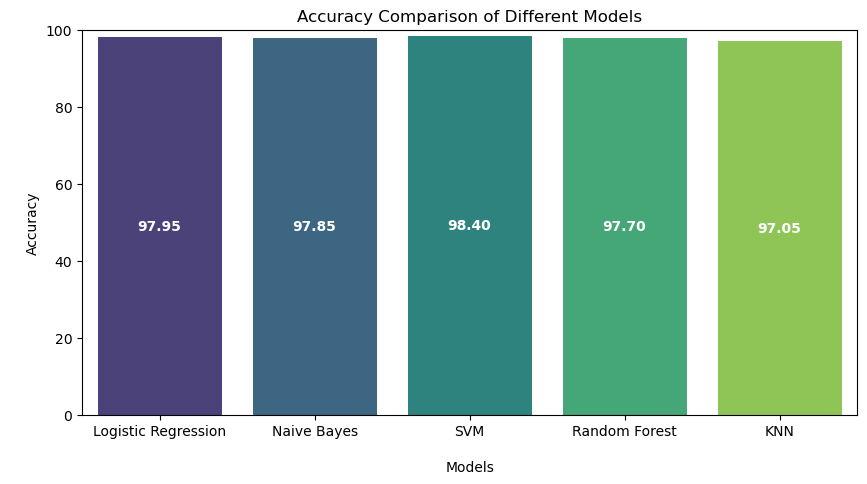

In [269]:
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"]
accuracies = [accuracy_score(y_test, y_pred1)*100, accuracy_score(y_test, y_pred2)*100, 
              accuracy_score(y_test, y_pred3)*100, accuracy_score(y_test, y_pred4)*100, 
              accuracy_score(y_test, y_pred5)*100]


plt.figure(figsize=(10, 5))
ax=sns.barplot(x=models, y=accuracies, palette="viridis")

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{accuracies[i]:.2f}',x
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.xlabel("\nModels")
plt.ylabel("\nAccuracy")

plt.title("Accuracy Comparison of Different Models")

plt.ylim(0, 100)  # Accuracy values range between 0 and 1

plt.show()


# BAR GRAPH COMPARING PRECISION OF EACH MODEL

C:\Users\arpita nayak\AppData\Local\Temp\ipykernel_17828\1401846390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models, y=precisions, palette="magma")


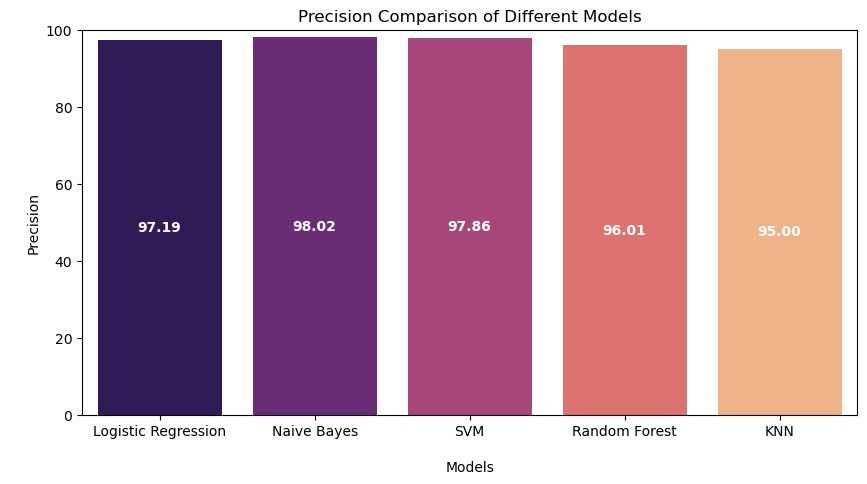

In [271]:
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"]
precisions = [precision_score(y_test, y_pred1)*100, precision_score(y_test, y_pred2)*100, 
              precision_score(y_test, y_pred3)*100, precision_score(y_test, y_pred4)*100, 
              precision_score(y_test, y_pred5)*100]

# Plot the bar graph
plt.figure(figsize=(10, 5))
ax=sns.barplot(x=models, y=precisions, palette="magma")

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{precisions[i]:.2f}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

# Labels and title
plt.xlabel("\nModels")
plt.ylabel("\nPrecision")

plt.title("Precision Comparison of Different Models")

plt.ylim(0, 100)  # Precision values range between 0 and 1

plt.show()


# BAR GRAPH COMPARING RECALL OF EACH MODEL

C:\Users\arpita nayak\AppData\Local\Temp\ipykernel_17828\2212774197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models, y=recalls, palette="coolwarm")


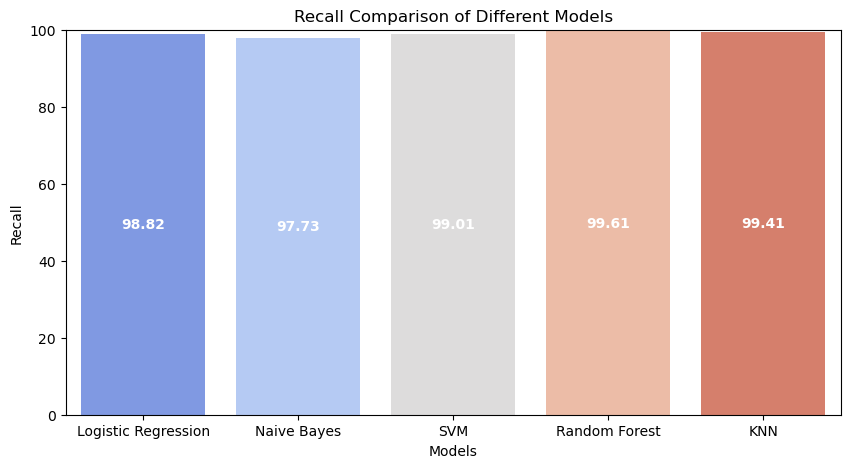

In [272]:
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"]
recalls = [recall_score(y_test, y_pred1)*100, recall_score(y_test, y_pred2)*100, 
           recall_score(y_test, y_pred3)*100, recall_score(y_test, y_pred4)*100, 
           recall_score(y_test, y_pred5)*100]

plt.figure(figsize=(10, 5))
ax=sns.barplot(x=models, y=recalls, palette="coolwarm")

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{recalls[i]:.2f}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.xlabel("Models")
plt.ylabel("Recall")

plt.title("Recall Comparison of Different Models")
plt.ylim(0, 100)  # Recall values range between 0 and 1

plt.show()


# BAR GRAPH COMPARING F1-SCORE OF EACH MODEL

C:\Users\arpita nayak\AppData\Local\Temp\ipykernel_17828\398547107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models, y=f1_scores, palette="crest")


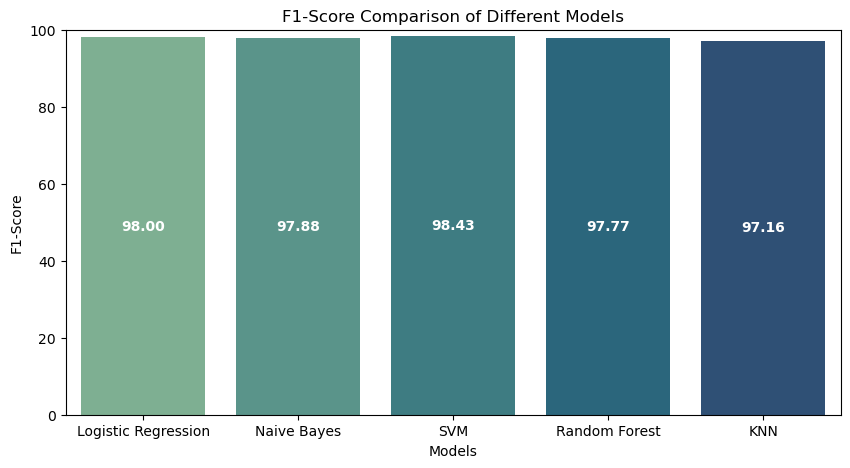

In [273]:
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"]
f1_scores = [f1_score(y_test, y_pred1)*100, f1_score(y_test, y_pred2)*100, 
             f1_score(y_test, y_pred3)*100, f1_score(y_test, y_pred4)*100, 
             f1_score(y_test, y_pred5)*100]

plt.figure(figsize=(10, 5))
ax=sns.barplot(x=models, y=f1_scores, palette="crest")

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{f1_scores[i]:.2f}',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.xlabel("Models")
plt.ylabel("F1-Score")

plt.title("F1-Score Comparison of Different Models")

plt.ylim(0, 100)  # F1-score values range between 0 and 1

plt.show()


# CONFUSION MATRIX FOR EACH MODEL

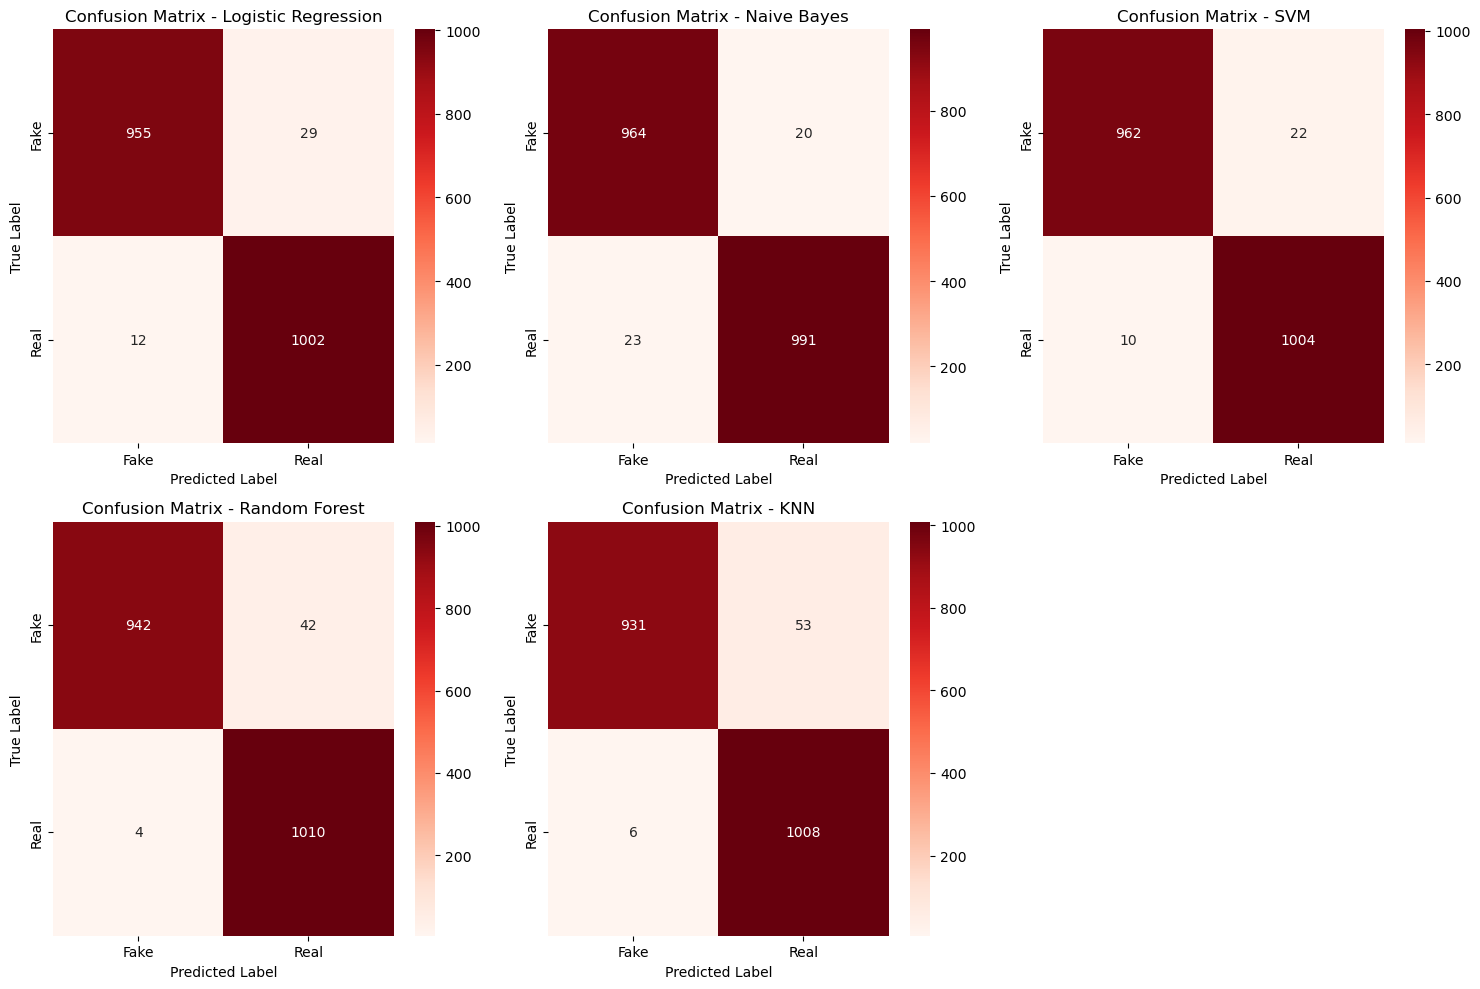

In [274]:
from sklearn.metrics import confusion_matrix

# Model names and predictions
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "KNN"]
preds = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]

# Create a figure with subplots (2 rows, 3 columns)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Reds", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(2, 3, 2)
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(2, 3, 3)
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True, fmt="d", cmap="Reds", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(2, 3, 4)
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt="d", cmap="Reds", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(2, 3, 5)
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, fmt="d", cmap="Reds", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()  
plt.show()


# TOP 20 MOST IMPORTANT WORDS HEATMAP

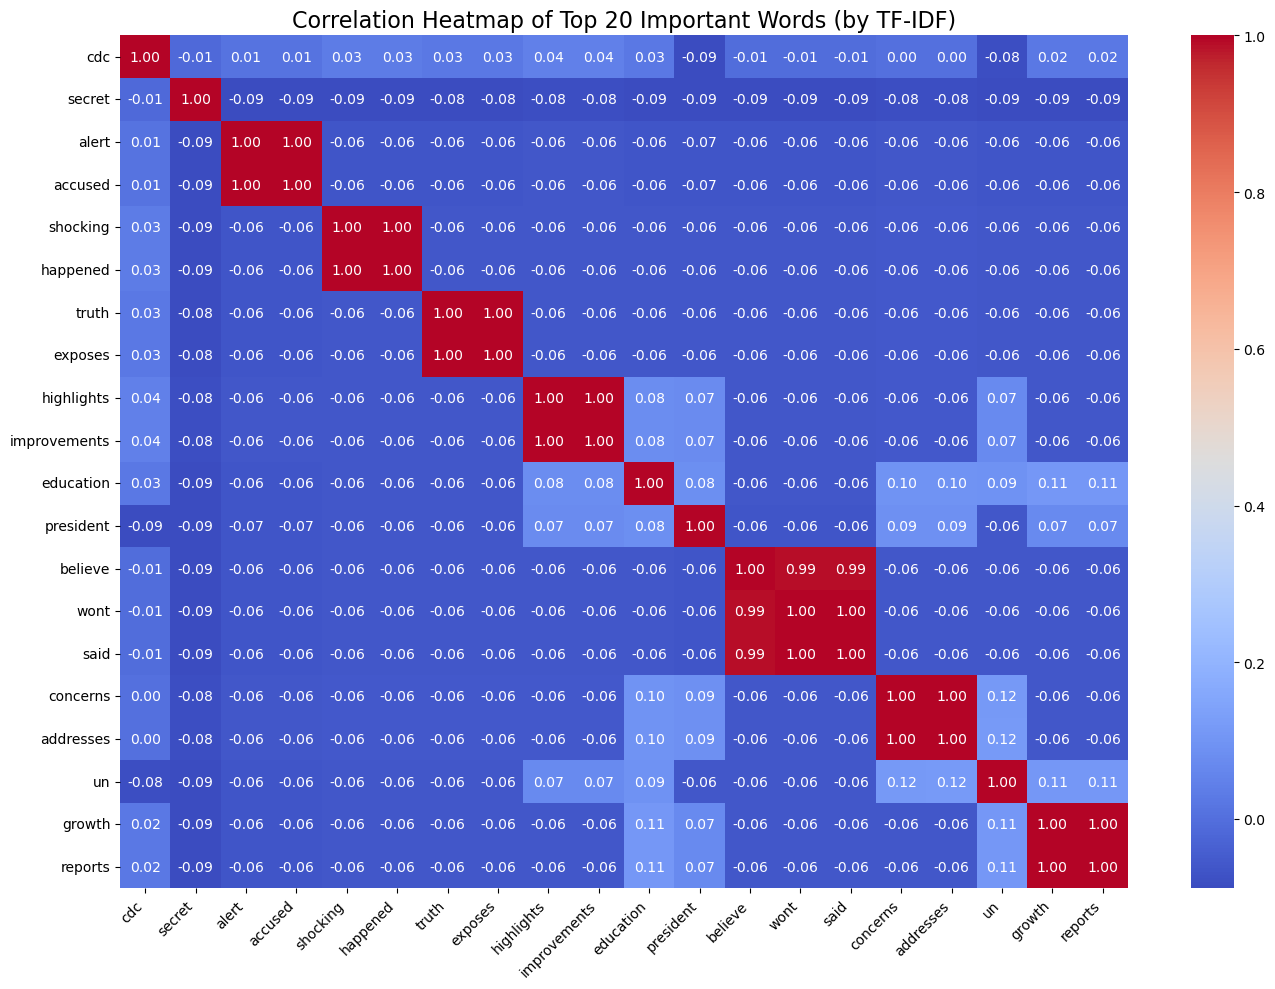

In [275]:
#Convert TF-IDF sparse matrix to dense DataFrame
X_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

#Calculate average TF-IDF for each feature and sort it in ascending order
avg_tfidf = X_df.mean().sort_values(ascending=False)

#top 20 words
top_20_words = avg_tfidf.head(20).index

# Filter dataframe to keep only these columns
top_words_df = X_df[top_20_words]

# Create correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_words_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Top 20 Important Words (by TF-IDF)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# WORD CLOUD FOR MOST FREQUENT WORDS

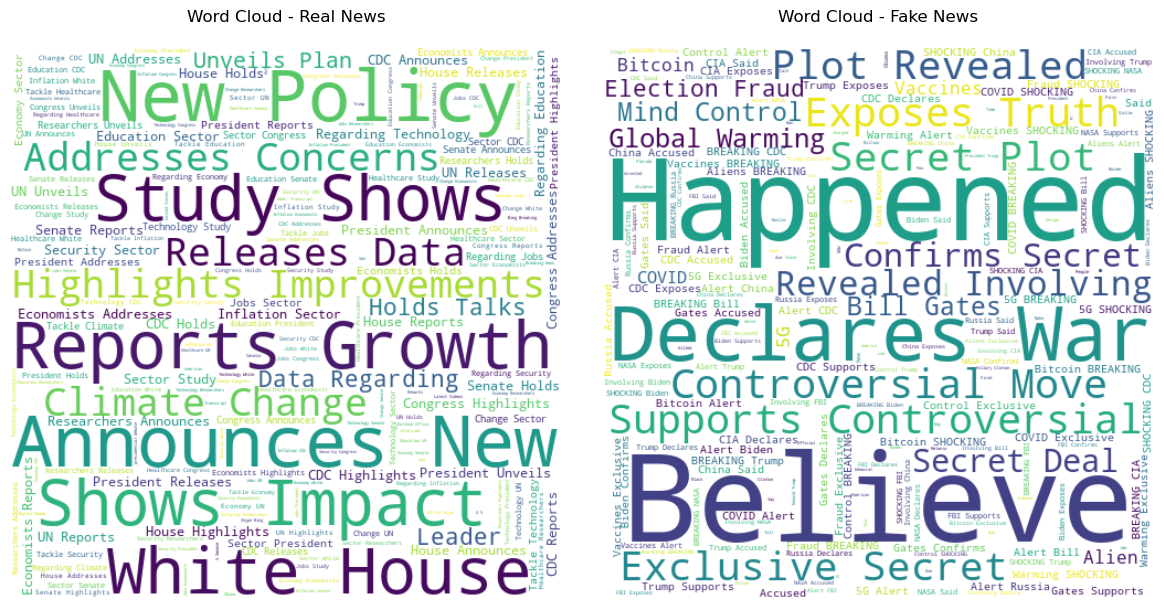

In [276]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

real_text = " ".join(real_df['title'])  # Assuming 'text' column has news content
fake_text = " ".join(fake_df['title'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_real = WordCloud(width=500, height=500, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Real News\n")

plt.subplot(1, 2, 2)
wordcloud_fake = WordCloud(width=500, height=500, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Fake News\n")

plt.tight_layout()
plt.show()


In [277]:
joblib.dump(model3, "model3.pkl") 

['model2.pkl']

In [278]:
import tkinter as tk
from tkinter import messagebox
from sklearn.feature_extraction.text import TfidfVectorizer

In [279]:
# Load the saved model and vectorizer
model = joblib.load("model3.pkl")
vectorizer = joblib.load("vectorizer.pkl")  

In [ ]:
def predict_news():
    text = entry.get("1.0", "end-1c")  # Get text from Text widget
    if not text.strip():
        messagebox.showwarning("Input Error", "Please enter some text.")
        return
    
    text_tfidf = vectorizer.transform([text])  # Transform input text
    prediction = model.predict(text_tfidf)[0]  # Make prediction
    
    if prediction == 1:
        result_label.config(text="Real News", fg="green")
    else:
        result_label.config(text="Fake News", fg="red")



In [ ]:
# Create Tkinter GUI
root = tk.Tk()
root.title("Fake News Detector")

tk.Label(root, text="Enter News Article:", font=("Arial", 12)).pack(pady=5)
entry = tk.Text(root, height=5, width=50)
entry.pack(pady=5)

predict_button = tk.Button(root, text="Check News", command=predict_news, font=("Arial", 12))
predict_button.pack(pady=5)

result_label = tk.Label(root, text="", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

root.mainloop()